In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Parameter
weight = 0.7
bias = 0.3
#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim =1)
y = weight*X +bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X) , len(y)

(50, 50)

In [4]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data= X_train,
                     train_labels = y_train,
                     test_data= X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
        
    plt.legend(prop={"size": 14})

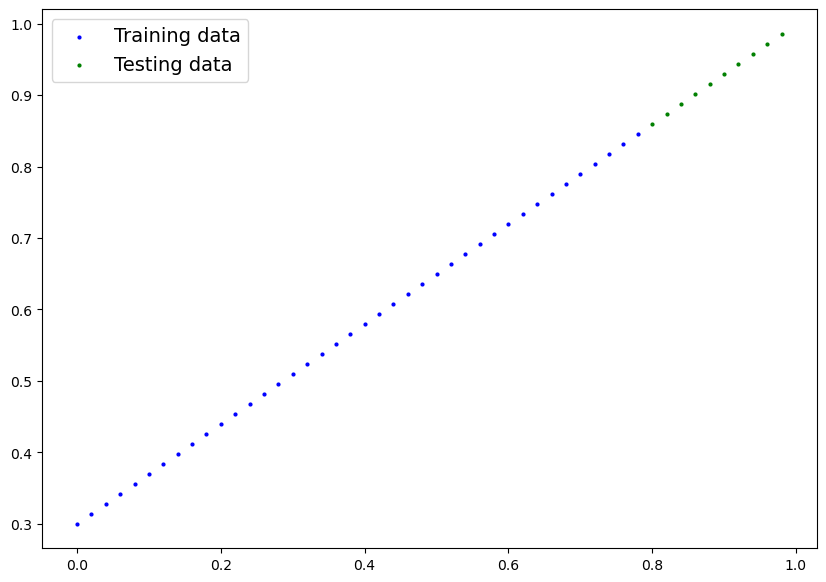

In [6]:
plot_predictions()

# What is happening?
## building model
* start with random values weights and bias
* look at the training data and adjust values to better represent the ideal values
How?
1. Gradient decent
2. Back propagation

In [7]:
## Building Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust to ideal
                                                requires_grad= True, # <- can this parameter be updatde by gradient descent?
                                                dtype = torch.float)) # <- Pytorch loves data type torch.float32
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

### Pytorch model building essentials
* torch.nn - contains all the building blocks
* torch.nn.parameter - parameters that the model should try and learn
* torch.nn.Module - The base class for all nn modules should overwrite forward()
* torch.optim - optimizer help with gradient descent
* def forward() - all nn.Module subclasses requires you to overwrite for forward computation.

In [8]:
#random seed
torch.manual_seed(37)
# Create instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.5394], requires_grad=True),
 Parameter containing:
 tensor([0.9952], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.5394])), ('bias', tensor([0.9952]))])

In [10]:
weight , bias

(0.7, 0.3)

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.5637],
        [0.5529],
        [0.5421],
        [0.5313],
        [0.5205],
        [0.5097],
        [0.4990],
        [0.4882],
        [0.4774],
        [0.4666]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

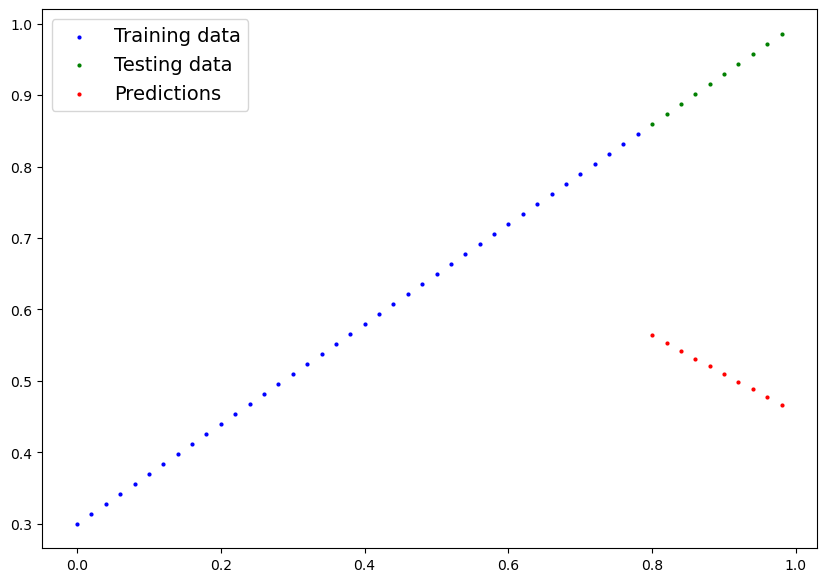

In [13]:
plot_predictions(predictions=y_preds)

# 3. Train model
### Things we need to train:
* **loss function:** A function to measure how wrong your models predictions are to the ideal outputs "lower is better"
* **Optimizer:** Takes into account to the loss of a model and adjusts the models parameters(weighs , bias)

### we need also:
* Training loop
* Testing loop

In [14]:
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01)

### Building a training loop in pytorch
1. loop through data
2. Forward pass through the model and make prediction on data-- **forward propagation**
3. calculate the loss
4. Optimizer zero grad
5. Loss backward -- **back propagation** to calculate gradient for each parameter with respect to the loss
6. Optimizer step

In [15]:
#epoch is 1 a loop through data
epochs = 500

#Tracking different values
epoch_count =[]
loss_values = []
test_loss_values = []
##Training
#Step 1
for epoch in range(epochs):
    model_0.train() # train mode in pytorch sets all parameters that requires gradient 
    #2. Forward pass
    y_pred = model_0(X_train)
    
    #3. calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    #4.optimizer zero grad
    optimizer.zero_grad()
    
    #5. Perform backpropagation
    loss.backward()
    
    #6. Step the optimizer(perform gradient descent)
    optimizer.step() #how the optimizer changes will acculumate through the loops so we had to zero them ealier in step 4 between each loop
   
    ## Testing
    model_0.eval() # turns off the gradient tracking
    with torch.inference_mode():
        # 1. Do forward pass
        test_pred = model_0(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)  
    print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss} ")
    # Print state_dict
    print(model_0.state_dict()) 

Loss: 0.29300495982170105
Epoch: 0 | loss: 0.29300495982170105 | Test loss: 0.4125025272369385 
OrderedDict([('weights', tensor([-0.5395])), ('bias', tensor([0.9907]))])
Loss: 0.2911500930786133
Epoch: 1 | loss: 0.2911500930786133 | Test loss: 0.41639581322669983 
OrderedDict([('weights', tensor([-0.5394])), ('bias', tensor([0.9867]))])
Loss: 0.2895486652851105
Epoch: 2 | loss: 0.2895486652851105 | Test loss: 0.4202890396118164 
OrderedDict([('weights', tensor([-0.5393])), ('bias', tensor([0.9827]))])
Loss: 0.28794723749160767
Epoch: 3 | loss: 0.28794723749160767 | Test loss: 0.4241822361946106 
OrderedDict([('weights', tensor([-0.5392])), ('bias', tensor([0.9787]))])
Loss: 0.28634577989578247
Epoch: 4 | loss: 0.28634577989578247 | Test loss: 0.42807549238204956 
OrderedDict([('weights', tensor([-0.5391])), ('bias', tensor([0.9747]))])
Loss: 0.28474435210227966
Epoch: 5 | loss: 0.28474435210227966 | Test loss: 0.43196868896484375 
OrderedDict([('weights', tensor([-0.5389])), ('bias', t

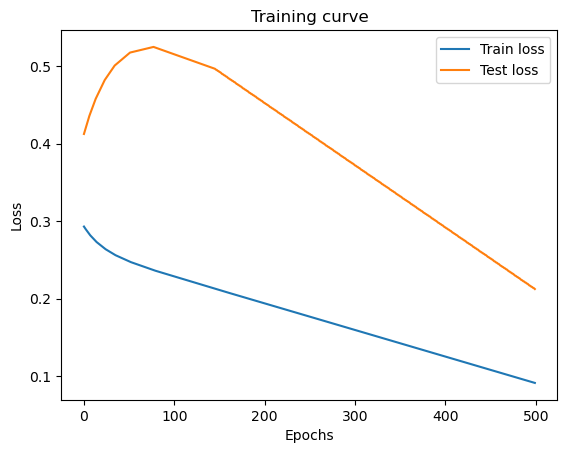

In [16]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label= "Train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [17]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2483])), ('bias', tensor([0.4897]))])

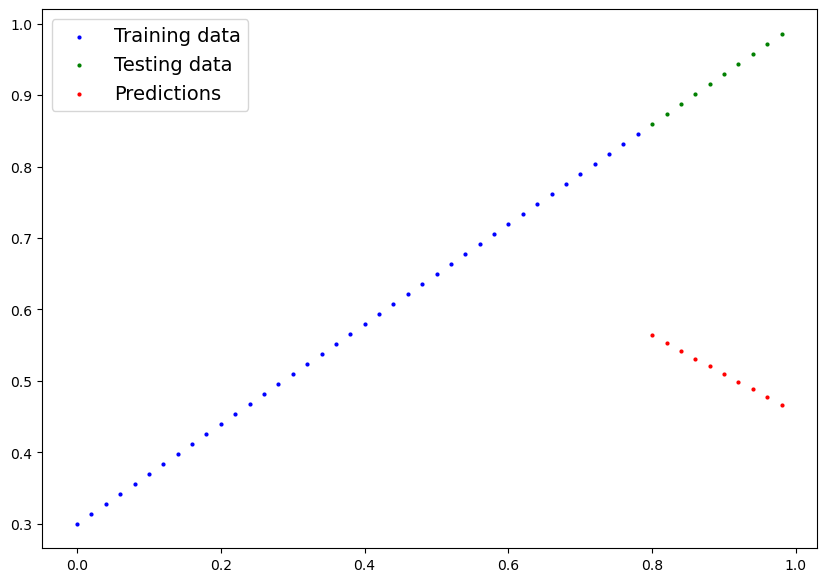

In [19]:
plot_predictions(predictions=y_preds)

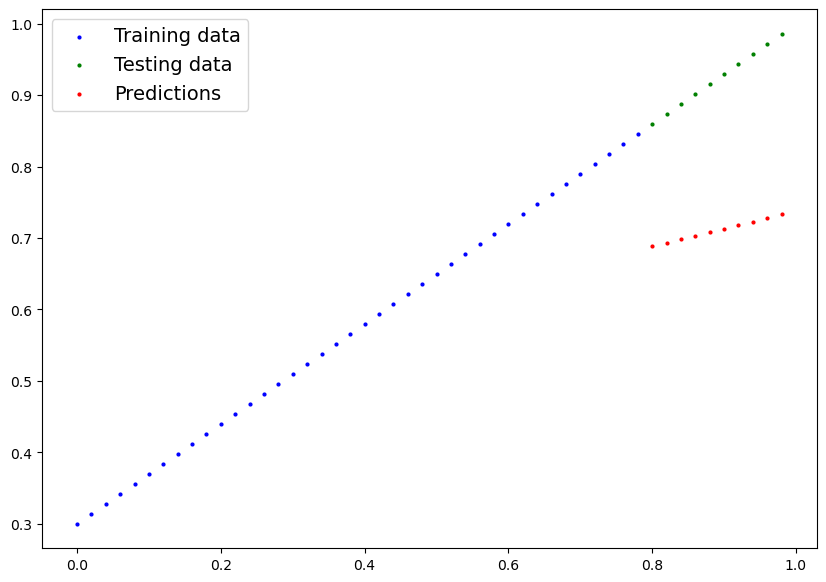

In [20]:
plot_predictions(predictions=y_preds_new)

## Saving model in PyTorch
Three main methods about saving.
1. `torch.save()` - allow pickle format
2. `torch.load()` - all to load saved model
3. `torch.nn.Module.load_state_dict()` - allow to load model saced state dictionary

In [21]:
from pathlib import Path
Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok = True)

Model_name = "test2.pth"
Model_save_path = Model_Path / Model_name

torch.save(obj=model_0.state_dict(), f= Model_save_path)


In [22]:
torch.save(model_0, "test.pth")

In [23]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f= Model_save_path))

<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2483])), ('bias', tensor([0.4897]))])

In [25]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.6883],
        [0.6933],
        [0.6983],
        [0.7032],
        [0.7082],
        [0.7131],
        [0.7181],
        [0.7231],
        [0.7280],
        [0.7330]])